In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

# Transformations


In [2]:
# Train transformations
train_transforms = transforms.Compose([
                                       transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.RandomHorizontalFlip(p=0.3),
                                       transforms.RandomRotation((-7.0, 7.0), fill=(1,1,1)),
                                       transforms.ToTensor(),
                                       transforms.Normalize( (0.49139968, 0.48215827 ,0.44653124), (0.24703233, 0.24348505, 0.26158768) ), # The mean and std
                                       ])

# Test transformations
test_transforms = transforms.Compose([
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.49139968, 0.48215827 ,0.44653124), (0.24703233, 0.24348505, 0.26158768)), # The mean and std
                                       ])


# Dataset and Creating Train/Test Split

In [3]:
train = datasets.CIFAR10('./data', train=True, download=True, transform=train_transforms)
test = datasets.CIFAR10('./data', train=False, download=True, transform=test_transforms)

100%|██████████| 170498071/170498071 [00:13<00:00, 13109120.91it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


# Dataloader Arguments & Test/Train Dataloaders


In [4]:
cuda = torch.cuda.is_available()
print("CUDA Available: ", cuda)

dataloader_args = dict(shuffle=True, batch_size=128, num_workers=2, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA Available:  True


In [1]:
import sys
from pathlib import Path
import os

In [2]:
FILE = Path(os.getcwd()).resolve()
ROOT = FILE.parents[0]  # project root directory
if str(ROOT) not in sys.path:
    sys.path.append(str(ROOT))  # add ROOT to PATH

In [4]:
import src.model
import src.utils

from src.model import *
from src.utils import *

## Sample Images

It is important that we view as many images as possible. This is required to get some idea on image augmentation later on

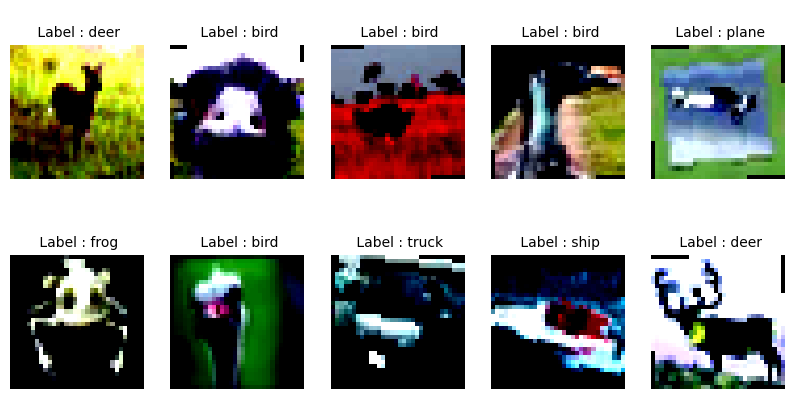

In [6]:
# Let's visualize some of the images
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

show_images(train_loader)

# Model Params


In [7]:
#!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Net(norm='LN').to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
              ReLU-2           [-1, 16, 32, 32]               0
         GroupNorm-3           [-1, 16, 32, 32]              32
           Dropout-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 16, 32, 32]           2,304
              ReLU-6           [-1, 16, 32, 32]               0
         GroupNorm-7           [-1, 16, 32, 32]              32
           Dropout-8           [-1, 16, 32, 32]               0
            Conv2d-9           [-1, 10, 32, 32]             160
        MaxPool2d-10           [-1, 10, 16, 16]               0
           Conv2d-11           [-1, 16, 16, 16]           1,440
             ReLU-12           [-1, 16, 16, 16]               0
        GroupNorm-13           [-1, 16, 16, 16]              32
          Dropout-14           [-1

# Training and Testing


In [8]:
from tqdm import tqdm

train_losses = []
test_losses = []
train_acc = []
test_acc = []

# Train and Test of our model

In [9]:
from torch.optim.lr_scheduler import StepLR

model =  Net(norm='LN').to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
#scheduler = StepLR(optimizer, step_size=6, gamma=0.1)
EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch + 1 )
    train(model, device, train_loader, optimizer, epoch,train_losses, train_acc)
    #scheduler.step()
    test(model, device, test_loader,test_losses, test_acc)

EPOCH: 1


Loss=1.4047942161560059 Batch_id=390 Accuracy=35.01: 100%|██████████| 391/391 [00:44<00:00,  8.70it/s]



Test set: Average loss: 1.4795, Accuracy: 4515/10000 (45.15%)

EPOCH: 2


Loss=1.2203937768936157 Batch_id=390 Accuracy=49.16: 100%|██████████| 391/391 [00:46<00:00,  8.46it/s]



Test set: Average loss: 1.2574, Accuracy: 5352/10000 (53.52%)

EPOCH: 3


Loss=1.2006186246871948 Batch_id=390 Accuracy=55.00: 100%|██████████| 391/391 [00:46<00:00,  8.39it/s]



Test set: Average loss: 1.1917, Accuracy: 5797/10000 (57.97%)

EPOCH: 4


Loss=1.2810046672821045 Batch_id=390 Accuracy=59.43: 100%|██████████| 391/391 [00:47<00:00,  8.31it/s]



Test set: Average loss: 1.0332, Accuracy: 6274/10000 (62.74%)

EPOCH: 5


Loss=0.9295903444290161 Batch_id=390 Accuracy=62.32: 100%|██████████| 391/391 [00:45<00:00,  8.65it/s]



Test set: Average loss: 0.9668, Accuracy: 6602/10000 (66.02%)

EPOCH: 6


Loss=0.8336769938468933 Batch_id=390 Accuracy=64.51: 100%|██████████| 391/391 [00:45<00:00,  8.67it/s]



Test set: Average loss: 0.9686, Accuracy: 6542/10000 (65.42%)

EPOCH: 7


Loss=0.8535611033439636 Batch_id=390 Accuracy=65.72: 100%|██████████| 391/391 [00:45<00:00,  8.53it/s]



Test set: Average loss: 0.9733, Accuracy: 6558/10000 (65.58%)

EPOCH: 8


Loss=0.9501621127128601 Batch_id=390 Accuracy=67.60: 100%|██████████| 391/391 [00:46<00:00,  8.32it/s]



Test set: Average loss: 0.8390, Accuracy: 7021/10000 (70.21%)

EPOCH: 9


Loss=0.9905182123184204 Batch_id=390 Accuracy=68.75: 100%|██████████| 391/391 [00:44<00:00,  8.78it/s]



Test set: Average loss: 0.8279, Accuracy: 7016/10000 (70.16%)

EPOCH: 10


Loss=0.8051015138626099 Batch_id=390 Accuracy=69.86: 100%|██████████| 391/391 [00:44<00:00,  8.76it/s]



Test set: Average loss: 0.7753, Accuracy: 7295/10000 (72.95%)

EPOCH: 11


Loss=0.6198209524154663 Batch_id=390 Accuracy=70.42: 100%|██████████| 391/391 [00:45<00:00,  8.56it/s]



Test set: Average loss: 0.7636, Accuracy: 7341/10000 (73.41%)

EPOCH: 12


Loss=0.7996407747268677 Batch_id=390 Accuracy=71.66: 100%|██████████| 391/391 [00:47<00:00,  8.31it/s]



Test set: Average loss: 0.7468, Accuracy: 7405/10000 (74.05%)

EPOCH: 13


Loss=0.7102808356285095 Batch_id=390 Accuracy=72.17: 100%|██████████| 391/391 [00:45<00:00,  8.65it/s]



Test set: Average loss: 0.7178, Accuracy: 7509/10000 (75.09%)

EPOCH: 14


Loss=0.6165179014205933 Batch_id=390 Accuracy=72.45: 100%|██████████| 391/391 [00:44<00:00,  8.73it/s]



Test set: Average loss: 0.7288, Accuracy: 7445/10000 (74.45%)

EPOCH: 15


Loss=0.9047269821166992 Batch_id=390 Accuracy=73.37: 100%|██████████| 391/391 [00:45<00:00,  8.57it/s]



Test set: Average loss: 0.7113, Accuracy: 7508/10000 (75.08%)

EPOCH: 16


Loss=0.6547605991363525 Batch_id=390 Accuracy=73.63: 100%|██████████| 391/391 [00:48<00:00,  8.14it/s]



Test set: Average loss: 0.7178, Accuracy: 7544/10000 (75.44%)

EPOCH: 17


Loss=0.7737621068954468 Batch_id=390 Accuracy=73.91: 100%|██████████| 391/391 [00:45<00:00,  8.55it/s]



Test set: Average loss: 0.6996, Accuracy: 7579/10000 (75.79%)

EPOCH: 18


Loss=0.9199427366256714 Batch_id=390 Accuracy=74.45: 100%|██████████| 391/391 [00:45<00:00,  8.66it/s]



Test set: Average loss: 0.6928, Accuracy: 7609/10000 (76.09%)

EPOCH: 19


Loss=0.8910247087478638 Batch_id=390 Accuracy=74.97: 100%|██████████| 391/391 [00:46<00:00,  8.49it/s]



Test set: Average loss: 0.6735, Accuracy: 7714/10000 (77.14%)

EPOCH: 20


Loss=0.7603943943977356 Batch_id=390 Accuracy=74.94: 100%|██████████| 391/391 [00:45<00:00,  8.63it/s]



Test set: Average loss: 0.6782, Accuracy: 7662/10000 (76.62%)



In [10]:
train_losses1 = [t.cpu().item() for t in train_losses]

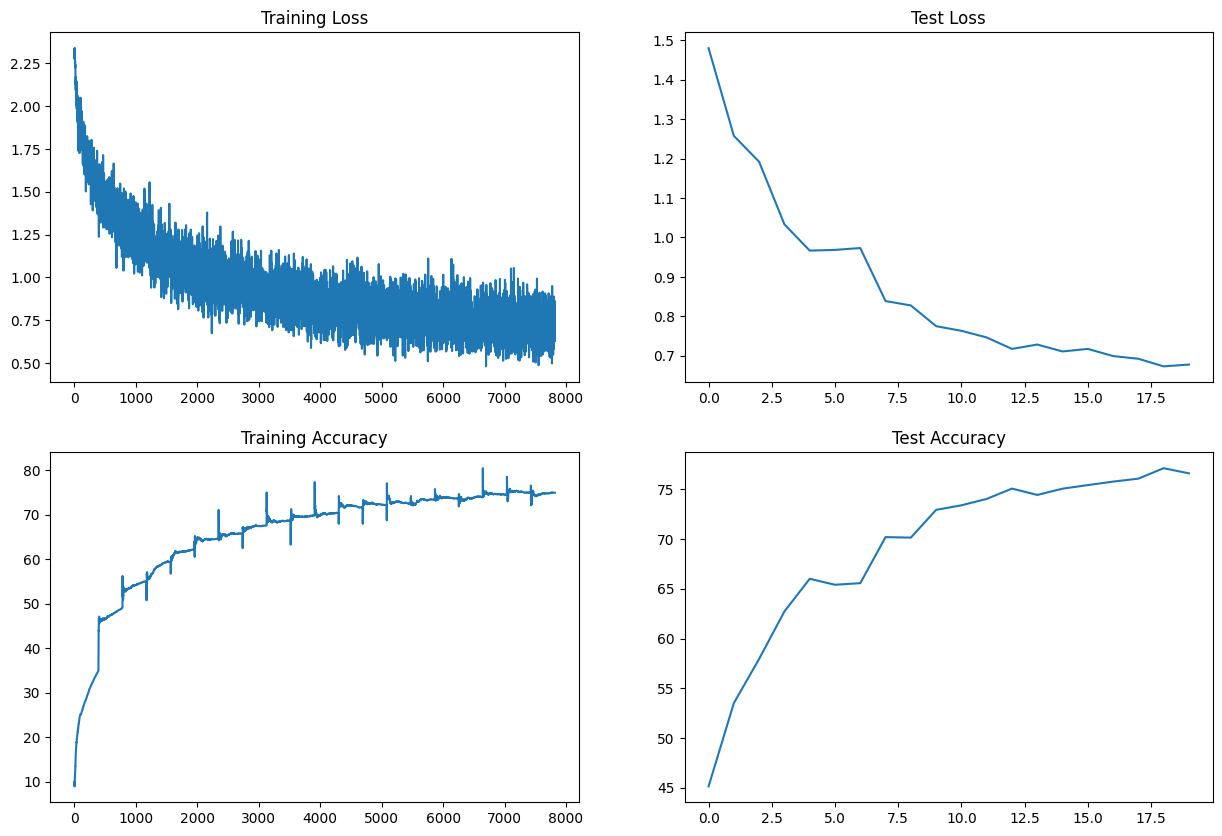

In [11]:
print_graph(train_losses1,train_acc, test_losses,test_acc)

In [12]:
wrong_prediction = []
model.eval()
for images, labels in test_loader:
    images, labels = images.to(device), labels.to(device)
    output = model(images)
    pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
    match = pred.eq(labels.view_as(pred)).to('cpu').numpy()
    for j, i in enumerate(match):
        if(i == False):
            wrong_prediction.append((images[j], pred[j].item(), labels[j].item()))

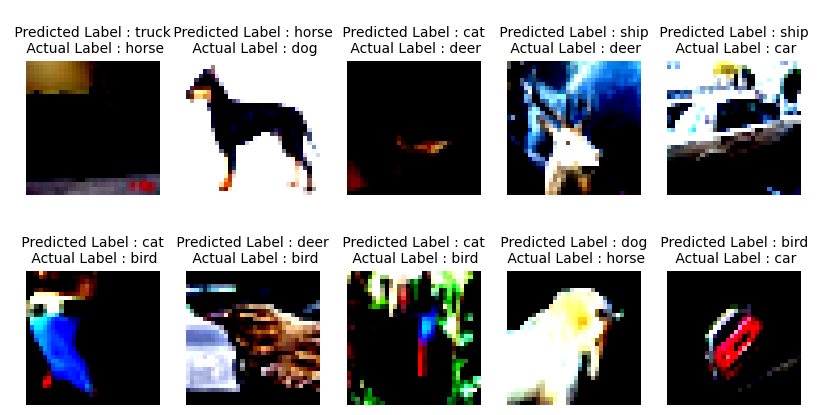

In [13]:
display_incorrect_images(wrong_prediction, n=10 )